In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd

In [67]:
def load_data():
    train = np.genfromtxt('q5_train.csv', delimiter=',', skip_header=1)
    test  = np.genfromtxt('q5_test.csv', delimiter=',', skip_header=1)
    return train, test

In [68]:
def plot_correlation_heatmap(X, y):
    feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feature_names)
    df["y"] = y

    corr = df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap (Features & Target)")
    plt.show()

In [69]:
def plot_feature_scatter(X, y):
    num_features = X.shape[1]
    feature_names = [f"Feature_{i+1}" for i in range(num_features)]

    plt.figure(figsize=(12, 4 * num_features))

    for i in range(num_features):
        plt.subplot(num_features, 1, i + 1)
        plt.scatter(X[:, i], y, alpha=0.6)
        plt.xlabel(feature_names[i])
        plt.ylabel("y")
        plt.title(f"{feature_names[i]} vs y")

    plt.tight_layout()
    plt.show()

In [70]:
if __name__=="__main__":
    train,test=load_data()
    lamda=np.logspace(-4,3,1000)
    X_train,y_train=train[:,0:train.shape[1]-1],train[:,train.shape[1]-1]
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)






        

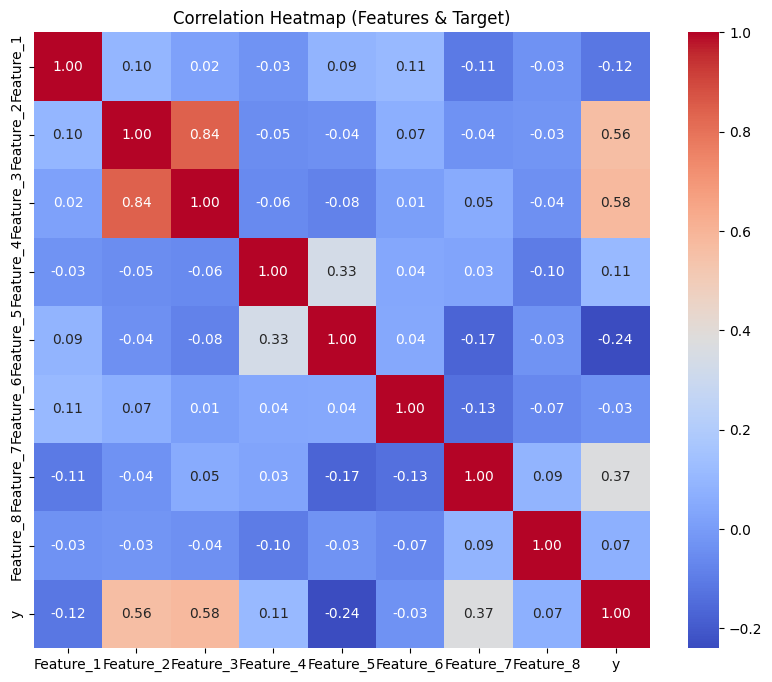

In [71]:
plot_correlation_heatmap(X_train,y_train)


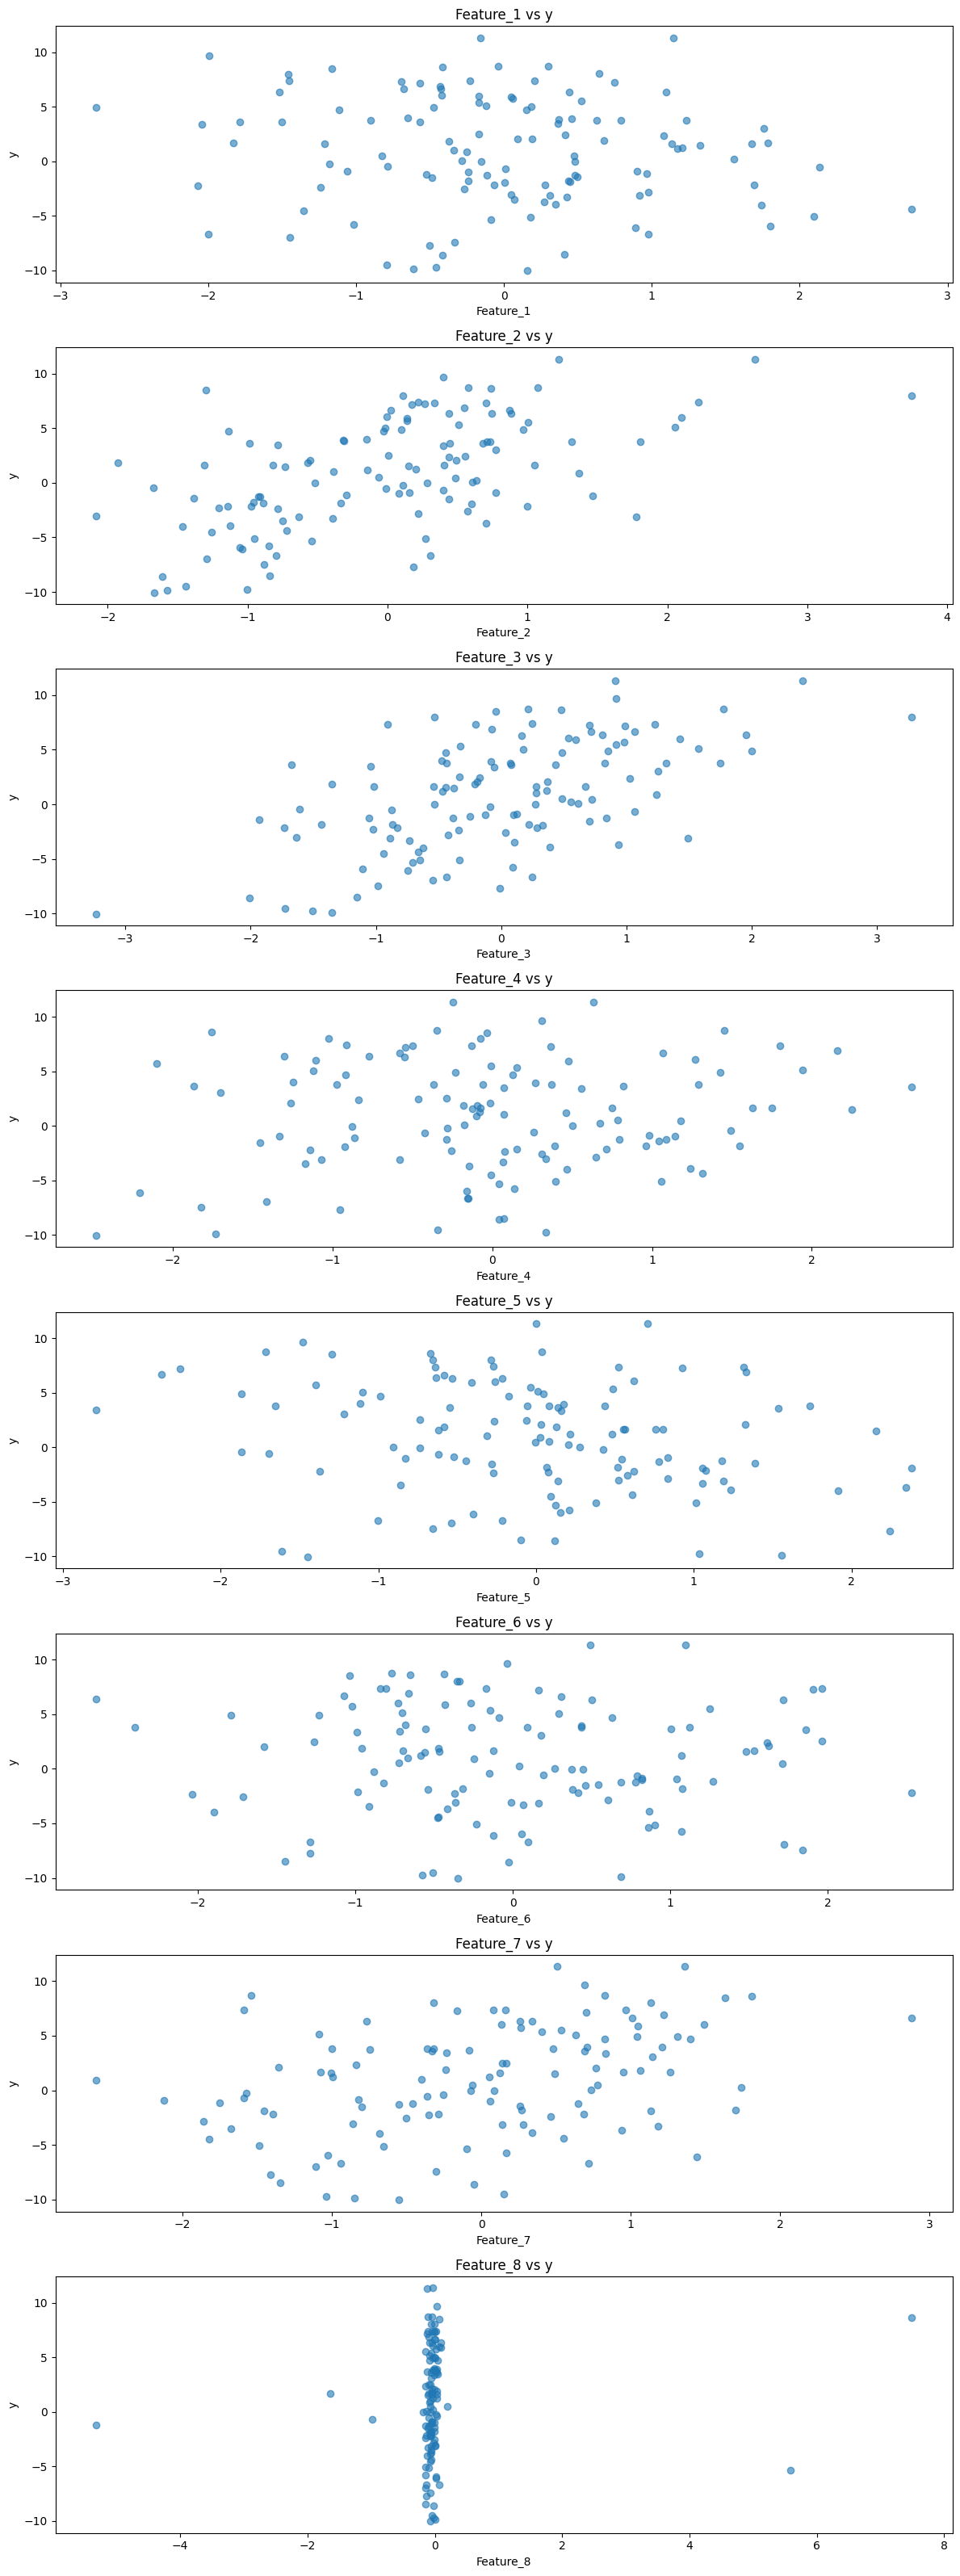

In [72]:
plot_feature_scatter(X_train,y_train)
    


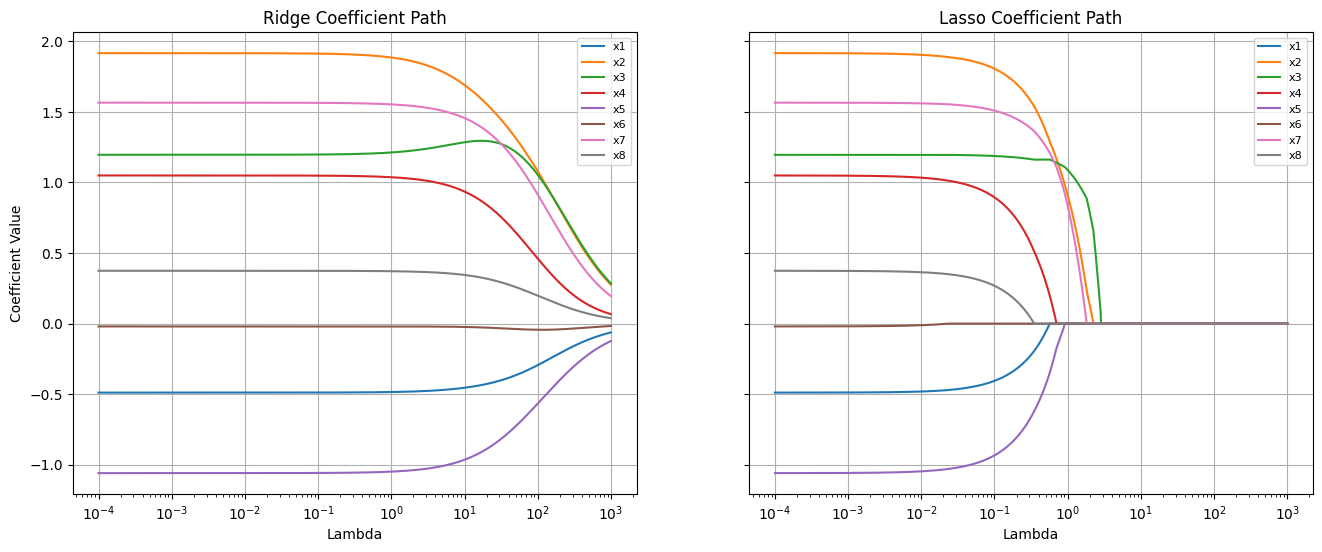

In [73]:
#training Ridge
ridge_coefficeints=[]
for t in lamda:
    p=Pipeline([
        ("scaler",StandardScaler()),
        ("model",Ridge(alpha=t))
    ])
    p.fit(X_train,y_train)
    ridge_coefficeints.append(p.named_steps["model"].coef_)
    
ridge_coefficeints=np.array(ridge_coefficeints)

#training lasso 
lasso_coefficeints=[]
for t in lamda:
    p=Pipeline([
        ("scaler",StandardScaler()),
        ("model",Lasso(alpha=t,max_iter=10000))
    ])
    p.fit(X_train,y_train)
    lasso_coefficeints.append(p.named_steps["model"].coef_)
    
lasso_coefficeints=np.array(lasso_coefficeints)
    
feature_names = [f"x{i+1}" for i in range(ridge_coefficeints.shape[1])]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Ridge
for i in range(ridge_coefficeints.shape[1]):
    axes[0].plot(lamda, ridge_coefficeints[:, i], label=feature_names[i])

axes[0].set_xscale("log")
axes[0].set_title("Ridge Coefficient Path")
axes[0].set_xlabel("Lambda")
axes[0].set_ylabel("Coefficient Value")
axes[0].legend(fontsize=8, loc="best")
axes[0].grid(True)

# Lasso
for i in range(lasso_coefficeints.shape[1]):
    axes[1].plot(lamda, lasso_coefficeints[:, i], label=feature_names[i])   

axes[1].set_xscale("log")
axes[1].set_title("Lasso Coefficient Path")
axes[1].set_xlabel("Lambda")
axes[1].legend(fontsize=8, loc="best")
axes[1].grid(True)

plt.show()

In [74]:
    
# x2 and x3 → column indices 1 and 2
corr = np.corrcoef(X_train[:, 1], X_train[:,2])[0, 1]  
print(corr)


0.8440000288978002


In [75]:
variances=np.var(X_train,axis=0)
feature_names=np.array(feature_names)
print(feature_names[np.argsort(-variances)])

['x8' 'x1' 'x7' 'x2' 'x6' 'x5' 'x3' 'x4']


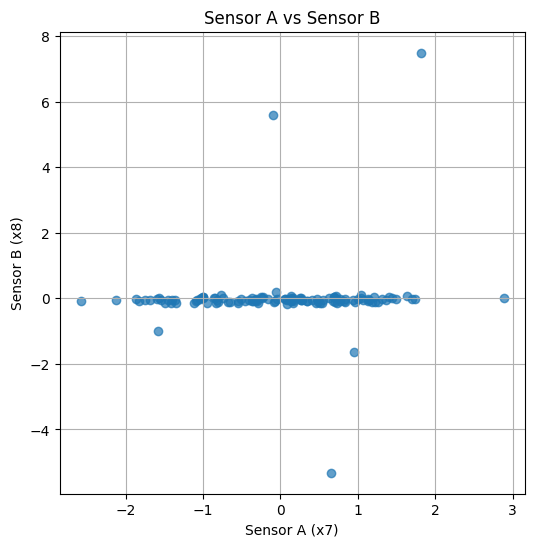

In [76]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 6], X_train[:, 7], alpha=0.7)

plt.xlabel("Sensor A (x7)")
plt.ylabel("Sensor B (x8)")
plt.title("Sensor A vs Sensor B")
plt.grid(True)
plt.show()

(120, 7)


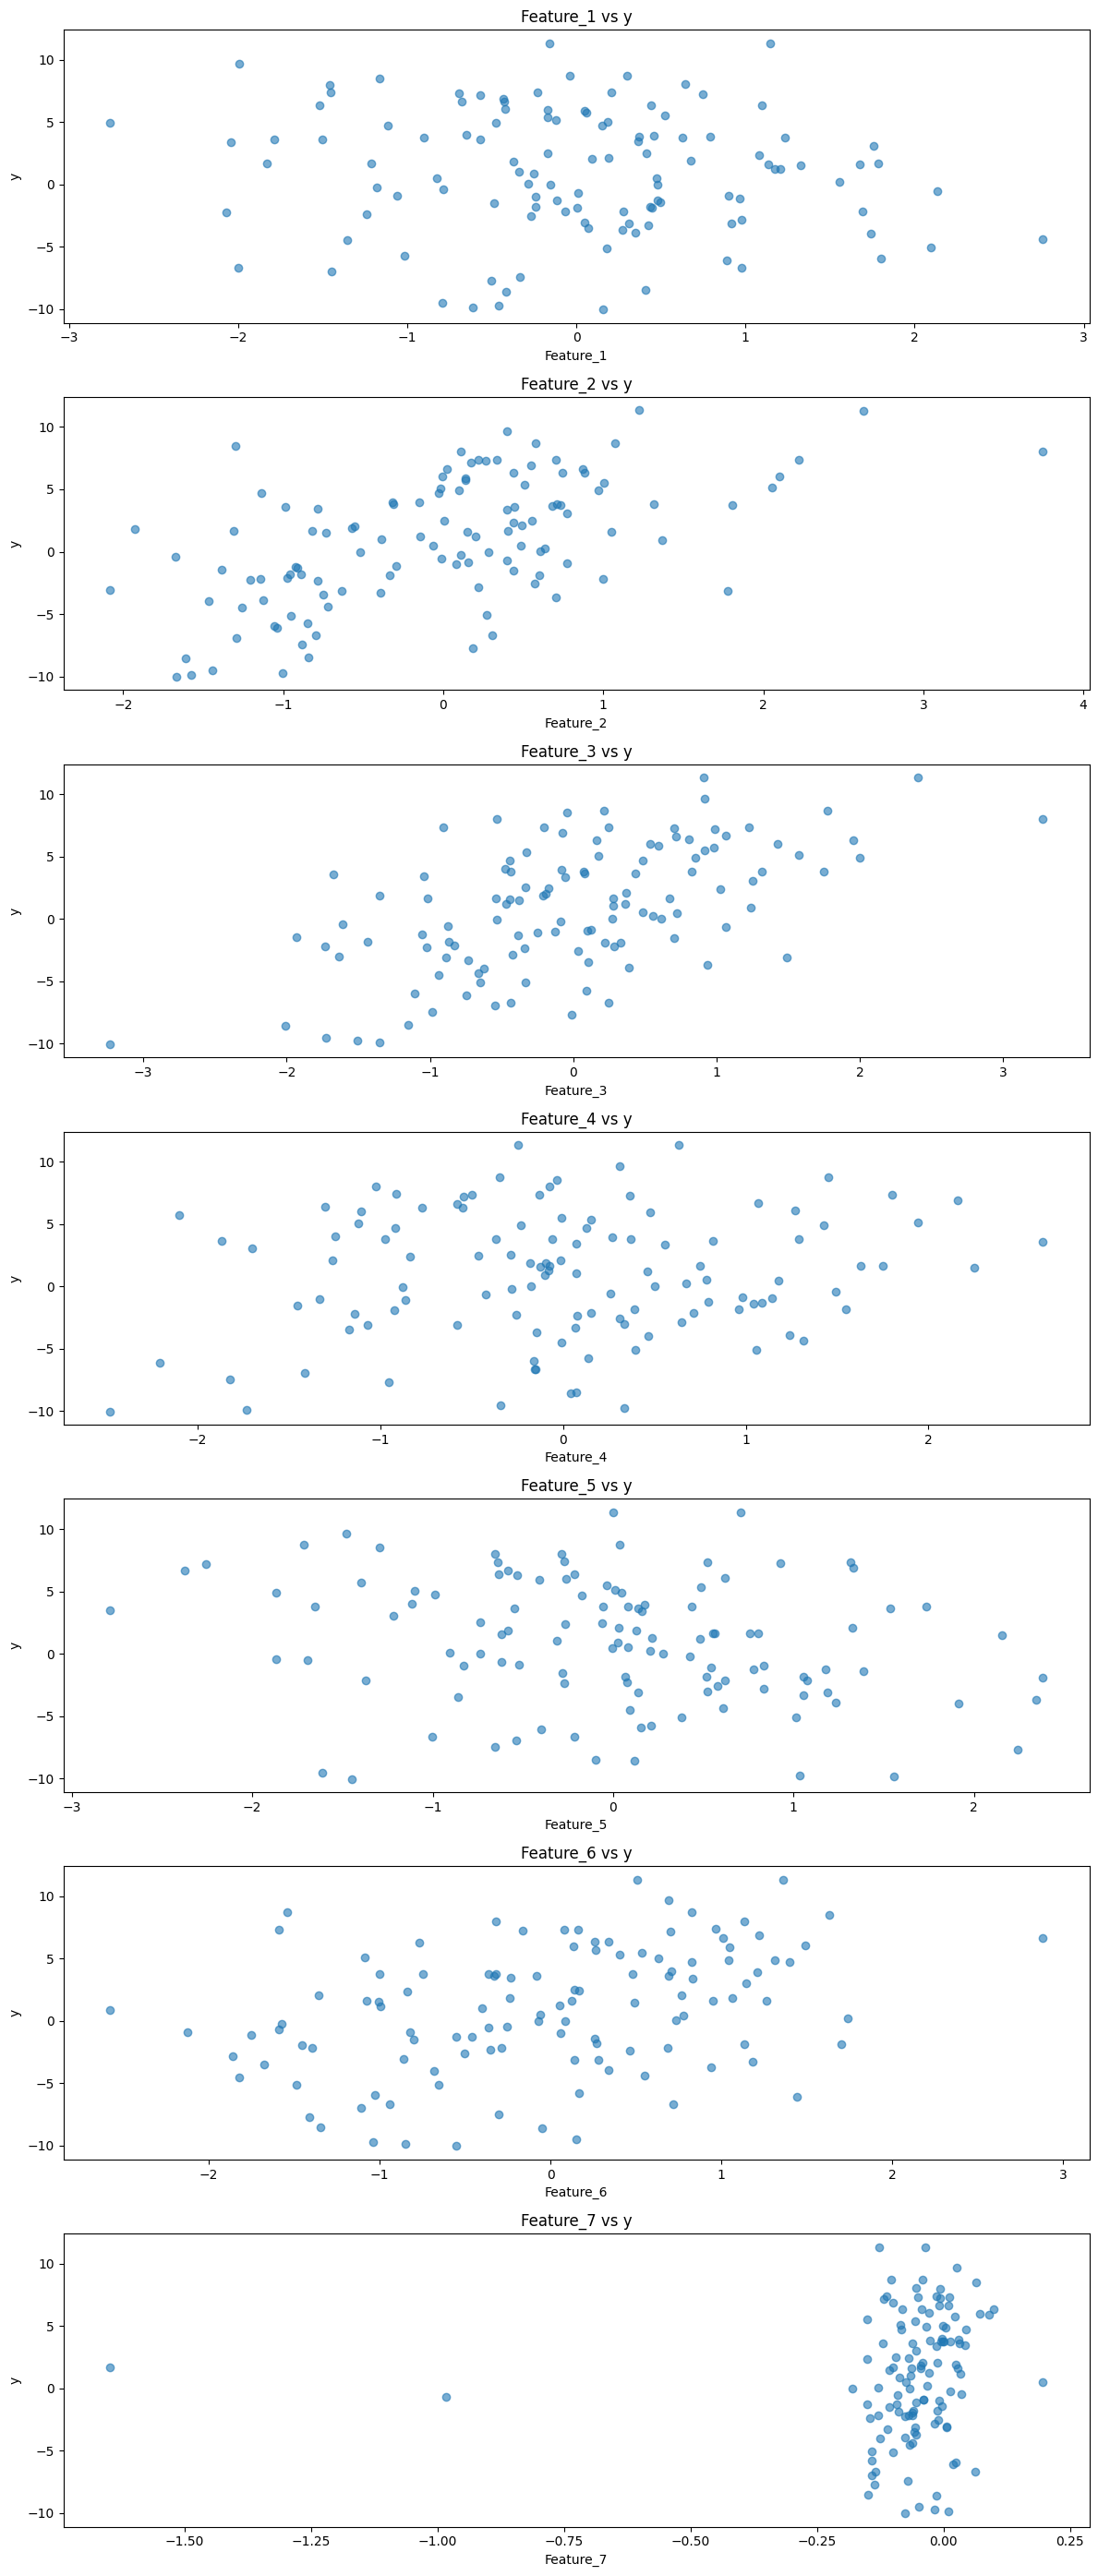

In [77]:
#removing 6th feature from training data set
X_train=np.delete(X_train,5,axis=1)
print(X_train.shape)

inliners=abs(X_train[:,6])<2

X_train=X_train[inliners]
y_train=y_train[inliners]
plot_feature_scatter(X_train,y_train)


In [ ]:
#best_model

p=Pipeline([
    ("robust",StandardScaler()),
    ("model",LassoCV(alphas=lamda,max_iter=10000))
])
p.fit(X_train,y_train)
best_alpha=p.named_steps["model"].alpha_
print(best_alpha)

X_test=test[:,1:test.shape[1]]
X_test=np.delete(X_test,5,axis=1)

X_test[X_test[:,6]>2]=0

y_test=p.predict(X_test)
submission = pd.DataFrame({
    "Id": np.arange(0, len(y_test)),
    "y": y_test
    
})

submission.to_csv("submission.csv", index=False)


22.927693128656486
